# For Cylindrical (E-Sphere) Particles

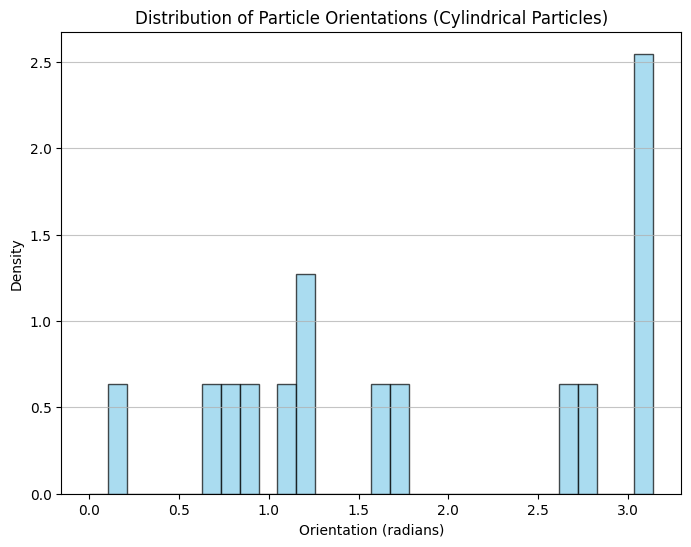

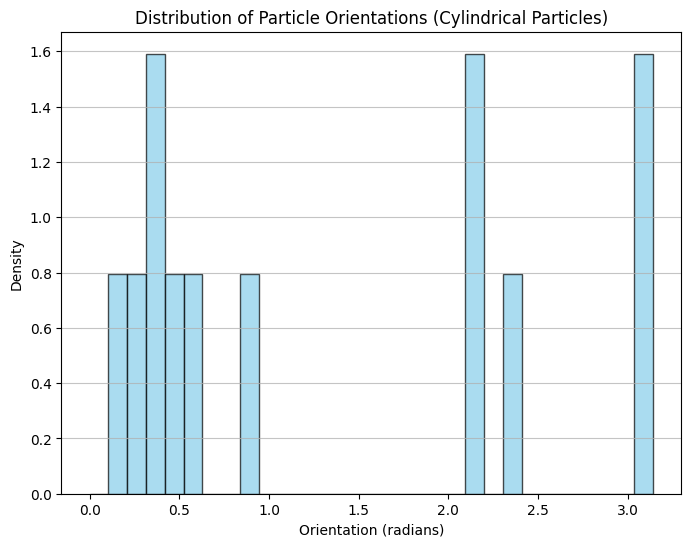

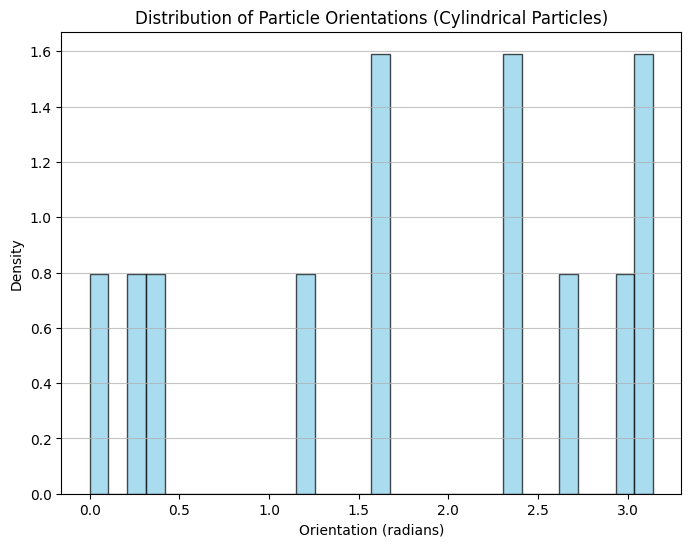

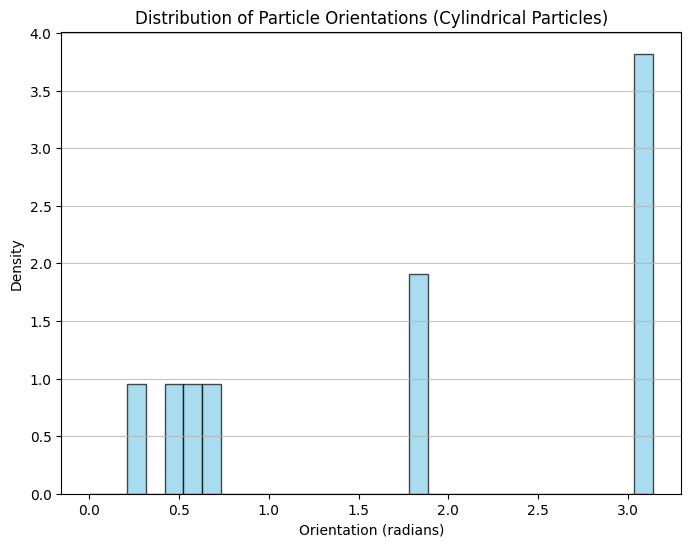

In [71]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def crop_image(image_path, x, y, w, h):
    image = cv2.imread(image_path)
    
    if image is None:
        print(f"Error: Unable to read the image at path: {image_path}")
        return None
    
    cropped_image = image[y:y+h, x:x+w]
    
    if cropped_image is None:
        print("Error: Unable to crop the image. Check the coordinates.")
    
    return cropped_image

def draw_orientation_cylindrical_particles(image_path):
    cropped_image = crop_image(image_path, 100, 100, 300, 300)
    
    if cropped_image is None:
        print("Error: Unable to proceed without a valid cropped image.")
        return
    
    # Convert to grayscale
    gray = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)
    
    # Enhance contrast using CLAHE
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced_image = clahe.apply(gray)
    
    # Apply GaussianBlur to reduce noise
    blurred_image = cv2.GaussianBlur(enhanced_image, (5, 5), 0)
    
    # Adaptive thresholding to isolate particles
    _, particles = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    # Find contours
    contours, _ = cv2.findContours(particles, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    orientations = []

    for contour in contours:
        # Filter contours based on area
        area = cv2.contourArea(contour)
        if area > 100:  # Adjust the area threshold based on particle size
            # Approximate the contour to reduce the number of points
            epsilon = 0.02 * cv2.arcLength(contour, True)
            approx = cv2.approxPolyDP(contour, epsilon, True)

            # Filter contours based on aspect ratio
            x, y, w, h = cv2.boundingRect(approx)
            aspect_ratio = float(w) / h
            if 0.5 < aspect_ratio < 2.0:  # Adjust aspect ratio range
                # Fit a rotated rectangle to the contour
                rect = cv2.minAreaRect(contour)
                box = cv2.boxPoints(rect)
                box = np.int0(box)
                cv2.drawContours(cropped_image, [box], 0, (255, 0, 0), 2)

                # Calculate orientation based on the longer side of the rectangle
                side1_len = np.linalg.norm(box[0] - box[1])
                side2_len = np.linalg.norm(box[1] - box[2])
                orientation = rect[2] * np.pi / 180.0 if side1_len > side2_len else (rect[2] + 90) * np.pi / 180.0
                orientations.append(orientation)

    # Plot Histogram without providing the number of particles
    plt.figure(figsize=(8, 6))
    plt.hist(orientations, bins=30, range=(0, np.pi), density=True, color='skyblue', alpha=0.7, edgecolor='black')
    plt.xlabel('Orientation (radians)')
    plt.ylabel('Density')
    plt.title('Distribution of Particle Orientations (Cylindrical Particles)')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

# Example Usage
draw_orientation_cylindrical_particles("En-SmallS0884.png")
draw_orientation_cylindrical_particles("En-SmallS0894.png")
draw_orientation_cylindrical_particles("En-SmallS0906.png")
draw_orientation_cylindrical_particles("En-SmallS0911.png")



# Prolate Elipsoidical and Prolate-s Particles

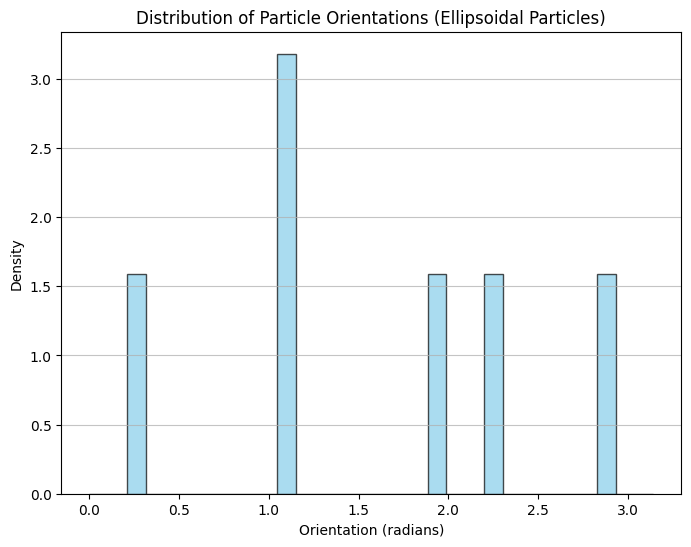

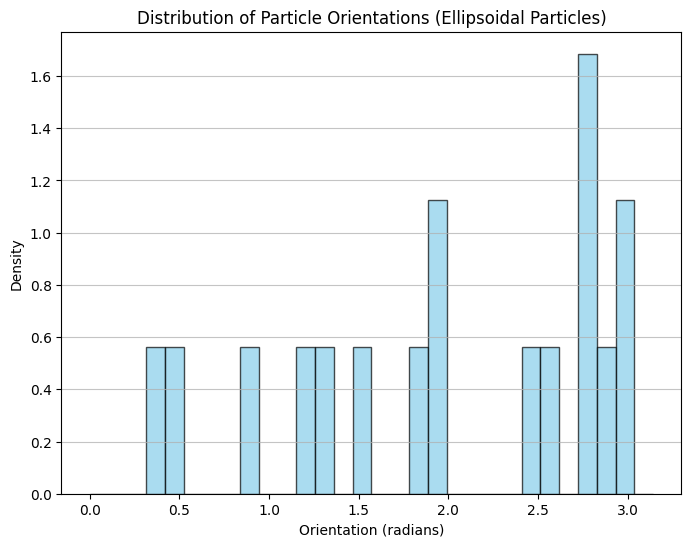

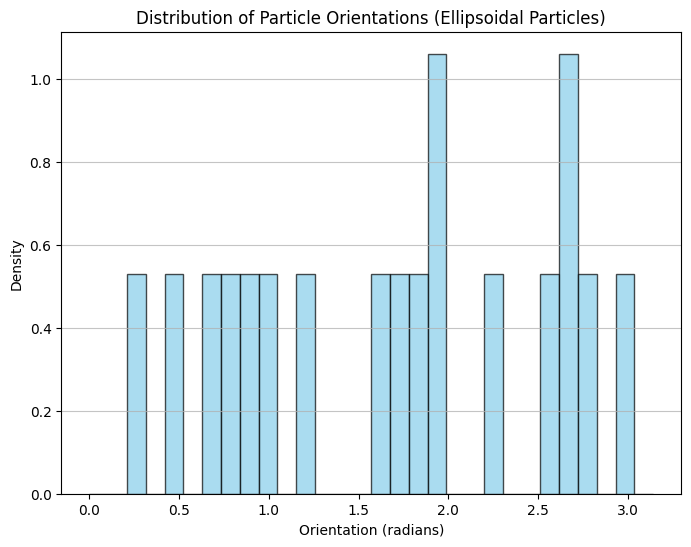

In [72]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def crop_image(image_path, x, y, w, h):
    """
    Crop the input image to the specified region of interest.
    Args:
        image_path (str): Path to the input image.
        x (int): x-coordinate of the top-left corner of the region.
        y (int): y-coordinate of the top-left corner of the region.
        w (int): Width of the region.
        h (int): Height of the region.
    Returns:
        np.ndarray: Cropped image.
    """
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    if image is None:
        print(f"Error: Unable to read the image at path: {image_path}")
        return None
    
    cropped_image = image[y:y+h, x:x+w]
    
    if cropped_image is None:
        print("Error: Unable to crop the image. Check the coordinates.")
    
    return cropped_image

def draw_orientation_ellipsoidal_particles(image_path):
    cropped_image = crop_image(image_path, 100, 100, 300, 300)
    
    if cropped_image is None:
        print("Error: Unable to proceed without a valid cropped image.")
        return
    
    # Enhance contrast using CLAHE
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced_image = clahe.apply(cropped_image)
    
    # Smooth the image to reduce noise
    smoothed_image = cv2.GaussianBlur(enhanced_image, (5, 5), 0)
    
    # Adaptive thresholding to isolate particles
    particles = cv2.adaptiveThreshold(smoothed_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    
    # Find contours
    contours, _ = cv2.findContours(particles, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    orientations = []

    for contour in contours:
        # Filter contours based on area
        area = cv2.contourArea(contour)
        if area > 100:  # Adjust the area threshold based on particle size
            # Approximate the contour to reduce the number of points
            epsilon = 0.02 * cv2.arcLength(contour, True)
            approx = cv2.approxPolyDP(contour, epsilon, True)

            # Filter contours based on aspect ratio
            x, y, w, h = cv2.boundingRect(approx)
            aspect_ratio = float(w) / h
            if 0.5 < aspect_ratio < 2.0:  # Adjust aspect ratio range
                # Fit an ellipse to the contour
                if len(approx) >= 5:
                    ellipse = cv2.fitEllipse(approx)
                    cv2.ellipse(cropped_image, ellipse, (255, 0, 0), 2)
                    orientation = ellipse[2] * np.pi / 180.0
                    orientations.append(orientation)

    # Plot Histogram without providing the number of particles
    plt.figure(figsize=(8, 6))
    plt.hist(orientations, bins=30, range=(0, np.pi), density=True, color='skyblue', alpha=0.7, edgecolor='black')
    plt.xlabel('Orientation (radians)')
    plt.ylabel('Density')
    plt.title('Distribution of Particle Orientations (Ellipsoidal Particles)')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

# Example Usage
draw_orientation_ellipsoidal_particles("Prolate-prolate0217.png")
draw_orientation_ellipsoidal_particles("Prolate-S0291.png")
draw_orientation_ellipsoidal_particles("Prolate-S0329.png")



# For Cuboidal Particles

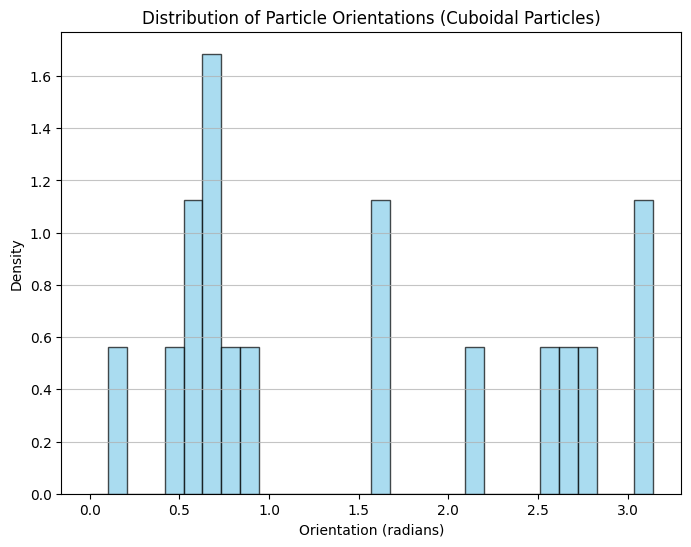

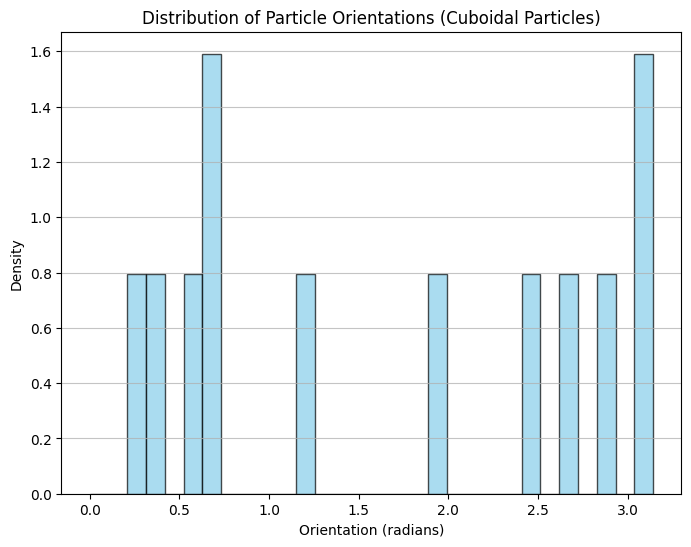

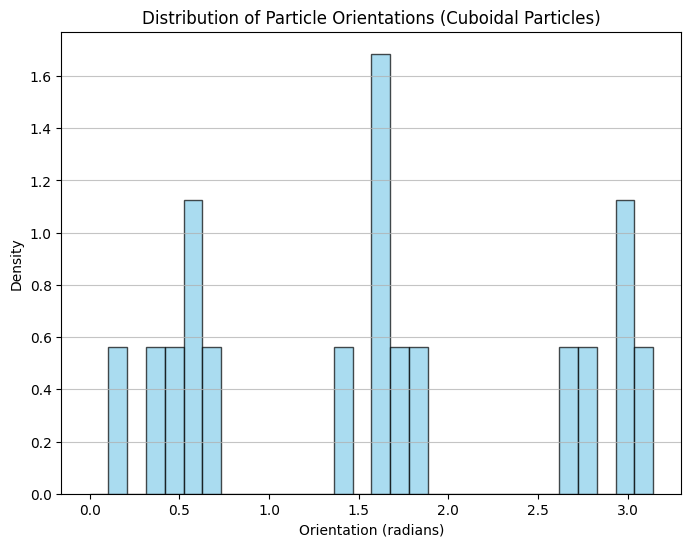

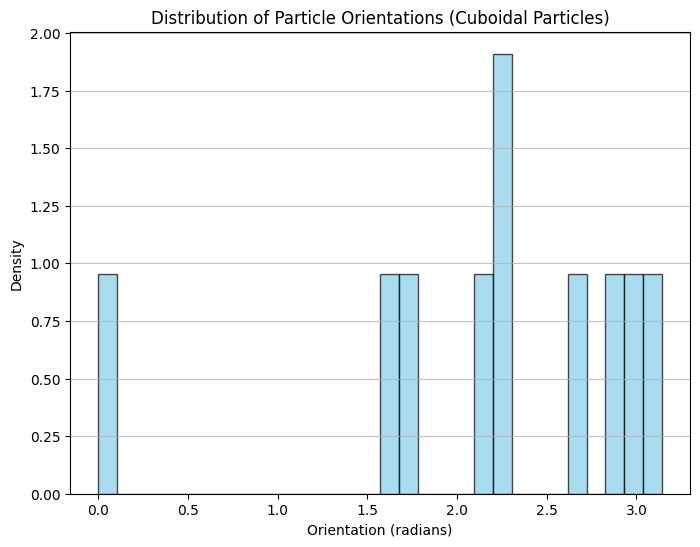

In [55]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def crop_image(image_path, x, y, w, h):
    """
    Crop the input image to the specified region of interest.
    Args:
        image_path (str): Path to the input image.
        x (int): x-coordinate of the top-left corner of the region.
        y (int): y-coordinate of the top-left corner of the region.
        w (int): Width of the region.
        h (int): Height of the region.
    Returns:
        np.ndarray: Cropped image.
    """
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    if image is None:
        print(f"Error: Unable to read the image at path: {image_path}")
        return None
    
    cropped_image = image[y:y+h, x:x+w]
    
    if cropped_image is None:
        print("Error: Unable to crop the image. Check the coordinates.")
    
    return cropped_image

def draw_orientation_cuboidal_particles(image_path):
    cropped_image = crop_image(image_path, 100, 100, 300, 300)
    
    if cropped_image is None:
        print("Error: Unable to proceed without a valid cropped image.")
        return
    
    # Enhance contrast using CLAHE
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced_image = clahe.apply(cropped_image)
    
    # Smooth the image to reduce noise
    smoothed_image = cv2.GaussianBlur(enhanced_image, (5, 5), 0)
    
    # Adaptive thresholding to isolate particles
    particles = cv2.adaptiveThreshold(smoothed_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    
    # Find contours
    contours, _ = cv2.findContours(particles, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    orientations = []

    for contour in contours:
        # Filter contours based on area
        area = cv2.contourArea(contour)
        if area > 100:  # Adjust the area threshold based on particle size
            # Approximate the contour to reduce the number of points
            epsilon = 0.02 * cv2.arcLength(contour, True)
            approx = cv2.approxPolyDP(contour, epsilon, True)

            # Filter contours based on aspect ratio
            x, y, w, h = cv2.boundingRect(approx)
            aspect_ratio = float(w) / h
            if 0.5 < aspect_ratio < 2.0:  # Adjust aspect ratio range
                # Fit a rotated rectangle to the contour
                rect = cv2.minAreaRect(contour)
                box = cv2.boxPoints(rect)
                box = np.int0(box)
                cv2.drawContours(cropped_image, [box], 0, (255, 0, 0), 2)

                # Calculate orientation based on the longer side of the rectangle
                side1_len = np.linalg.norm(box[0] - box[1])
                side2_len = np.linalg.norm(box[1] - box[2])
                orientation = rect[2] * np.pi / 180.0 if side1_len > side2_len else (rect[2] + 90) * np.pi / 180.0
                orientations.append(orientation)

    # Plot Histogram without providing the number of particles
    plt.figure(figsize=(8, 6))
    plt.hist(orientations, bins=30, range=(0, np.pi), density=True, color='skyblue', alpha=0.7, edgecolor='black')
    plt.xlabel('Orientation (radians)')
    plt.ylabel('Density')
    plt.title('Distribution of Particle Orientations (Cuboidal Particles)')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

# Example Usage


draw_orientation_cuboidal_particles("Prolate-cuboid1019.png")
draw_orientation_cuboidal_particles("Prolate-cuboid1022.png")
draw_orientation_cuboidal_particles("Prolate-cuboid1025.png")
draw_orientation_cuboidal_particles("Prolate-cuboid1064.png")



# For Cube Particles

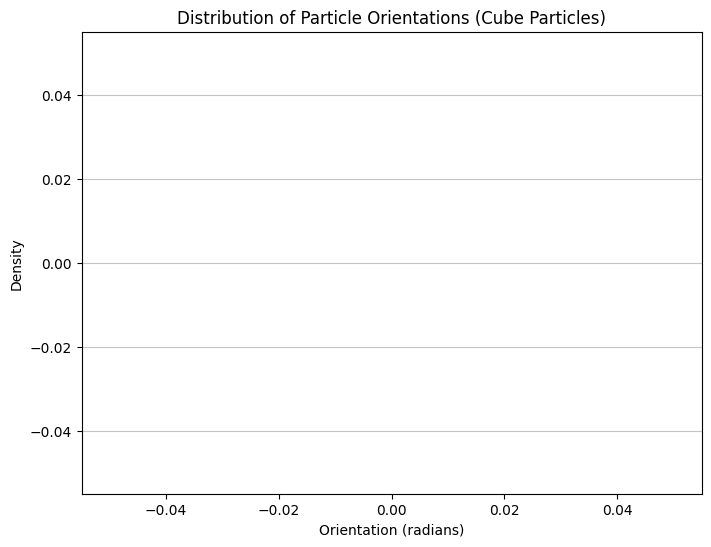

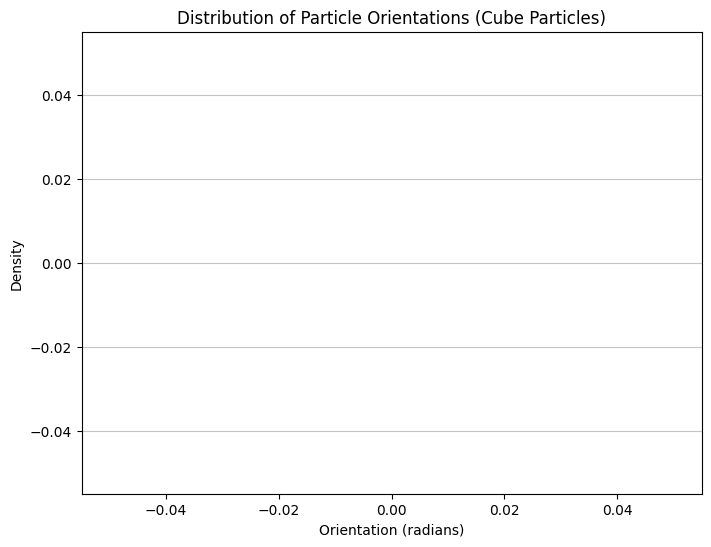

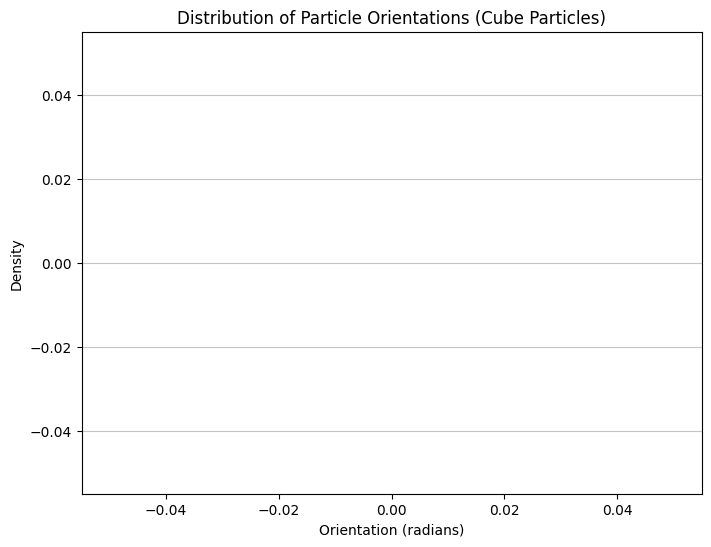

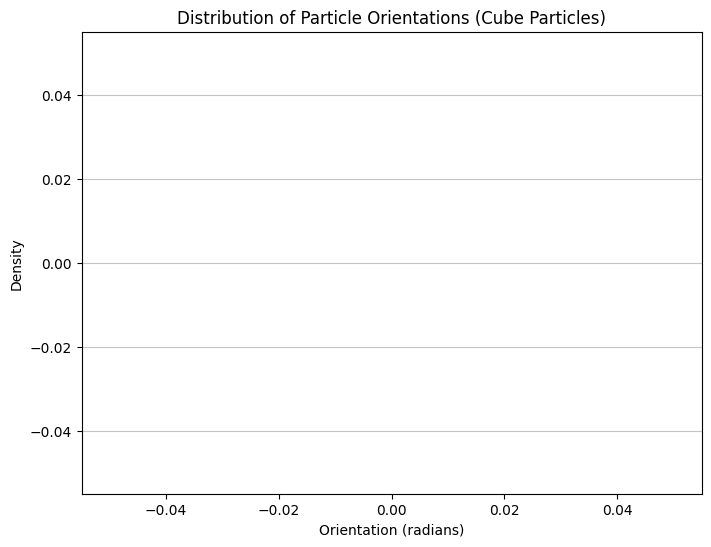

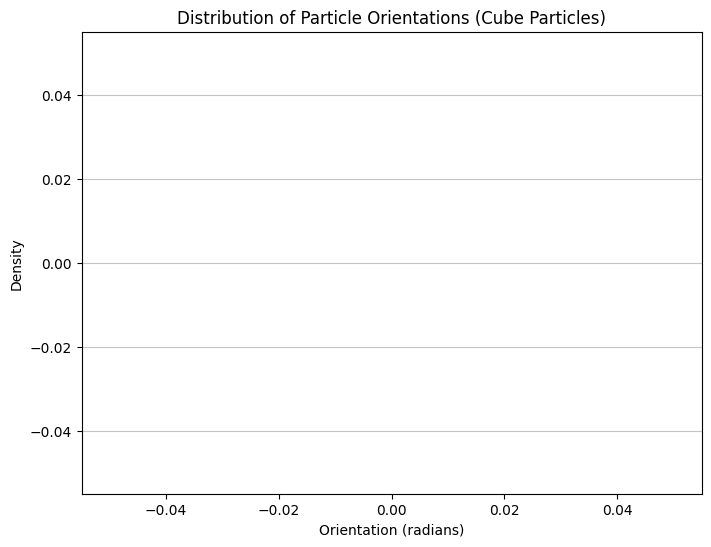

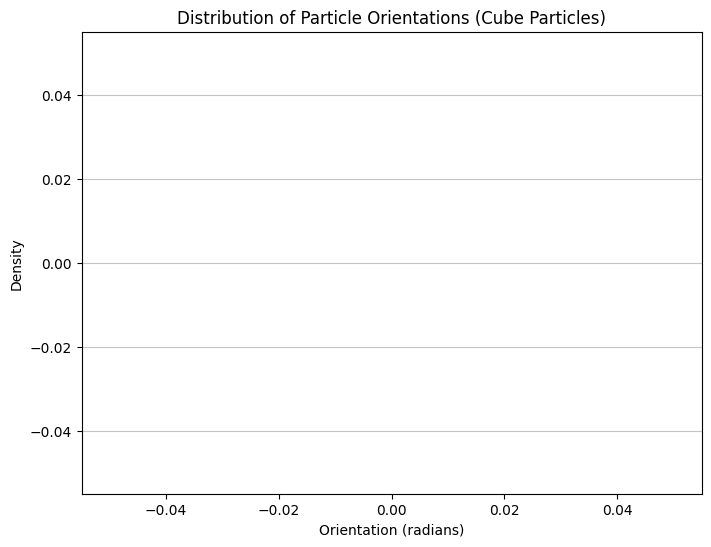

In [63]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def crop_image(image_path, x, y, w, h):
    image = cv2.imread(image_path)
    
    if image is None:
        print(f"Error: Unable to read the image at path: {image_path}")
        return None
    
    cropped_image = image[y:y+h, x:x+w]
    
    if cropped_image is None:
        print("Error: Unable to crop the image. Check the coordinates.")
    
    return cropped_image

def draw_orientation_cube_particles(image_path):
    cropped_image = crop_image(image_path, 100, 100, 300, 300)
    
    if cropped_image is None:
        print("Error: Unable to proceed without a valid cropped image.")
        return
    
    # Convert the image to grayscale
    gray = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)
    
    # Apply histogram equalization to enhance contrast
    equalized = cv2.equalizeHist(gray)
    
    # Apply GaussianBlur to reduce noise
    blurred = cv2.GaussianBlur(equalized, (5, 5), 0)
    
    # Apply Canny edge detector
    edges = cv2.Canny(blurred, 50, 150)
    
    # Perform morphological operations to enhance features
    kernel = np.ones((5,5), np.uint8)
    morphed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)
    
    # Find contours
    contours, _ = cv2.findContours(morphed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    orientations = []

    for contour in contours:
        # Filter contours based on area
        area = cv2.contourArea(contour)
        if area > 100:  # Adjust the area threshold based on particle size
            # Approximate the contour to reduce the number of points
            epsilon = 0.02 * cv2.arcLength(contour, True)
            approx = cv2.approxPolyDP(contour, epsilon, True)

            # Filter contours based on the number of vertices (cubes have 4 vertices)
            if len(approx) == 4:
                # Fit a bounding rectangle to the contour
                x, y, w, h = cv2.boundingRect(approx)
                aspect_ratio = float(w) / h
                if 0.9 < aspect_ratio < 1.1:  # Adjust aspect ratio range
                    cv2.drawContours(cropped_image, [approx], 0, (255, 0, 0), 2)

                    # Calculate orientation (cubes are orientation invariant)
                    orientation = 0.0
                    orientations.append(orientation)

    # Plot Histogram without providing the number of particles
    plt.figure(figsize=(8, 6))
    plt.hist(orientations, bins=30, range=(0, np.pi), density=True, color='skyblue', alpha=0.7, edgecolor='black')
    plt.xlabel('Orientation (radians)')
    plt.ylabel('Density')
    plt.title('Distribution of Particle Orientations (Cube Particles)')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

# Example Usage

#draw_orientation_cube_particles("your_image_path.png")

draw_orientation_cube_particles("Prolate-cube0195.png")
draw_orientation_cube_particles("Prolate-cube0196.png")
draw_orientation_cube_particles("Prolate-cube0241.png")
draw_orientation_cube_particles("Prolate-cube0253.png")
draw_orientation_cube_particles("Prolate-cube0268.png")
draw_orientation_cube_particles("Prolate-cube0287.png")

# For Oblate -s particles

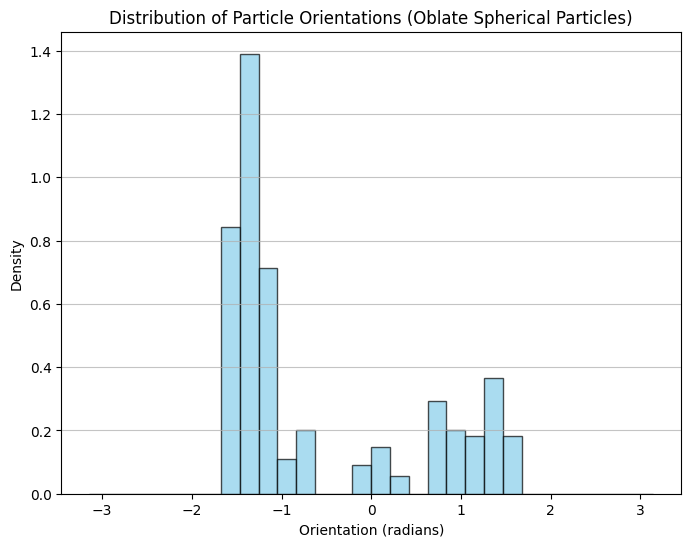

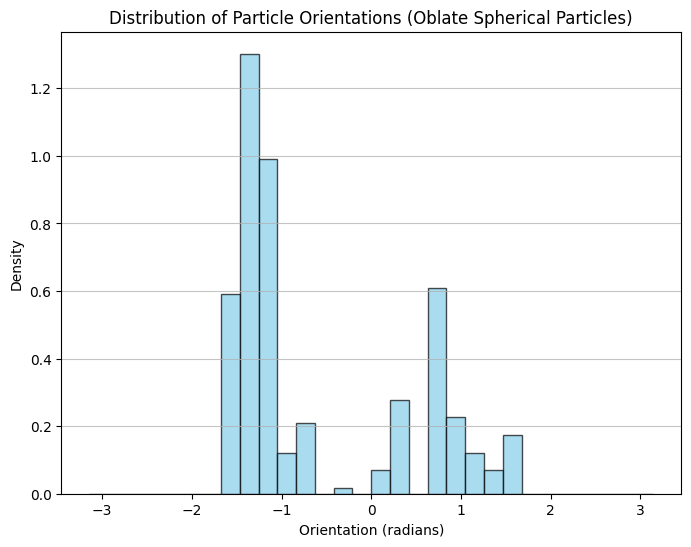

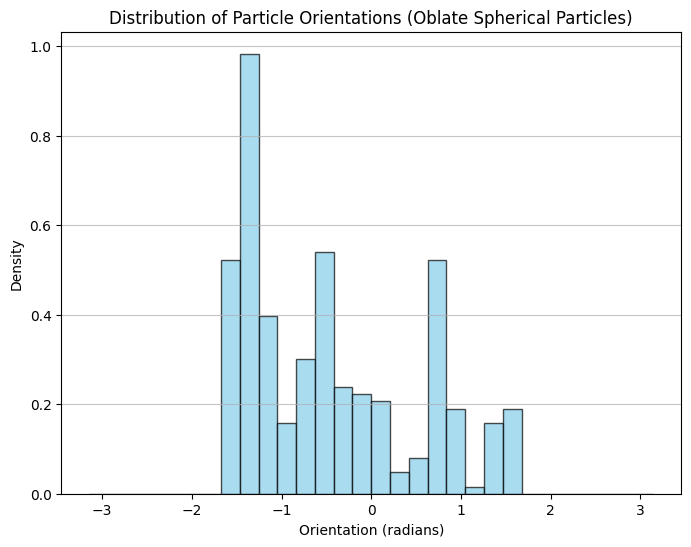

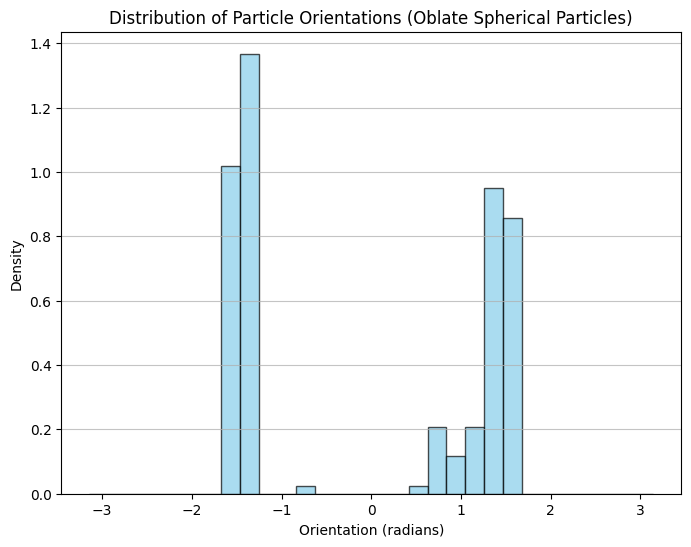

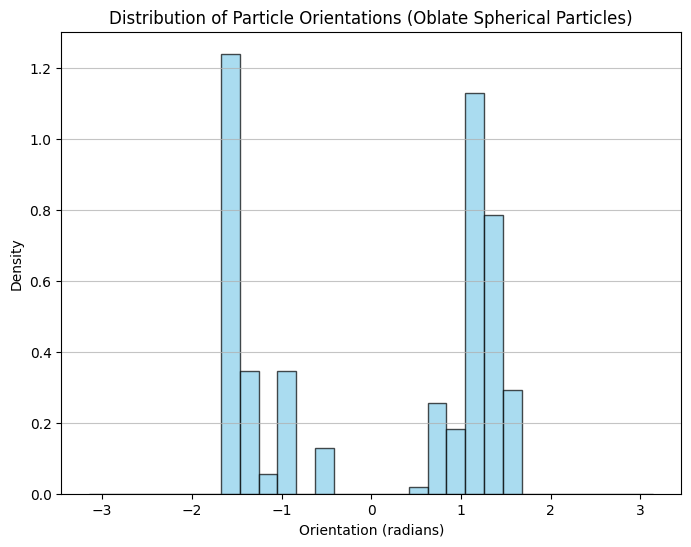

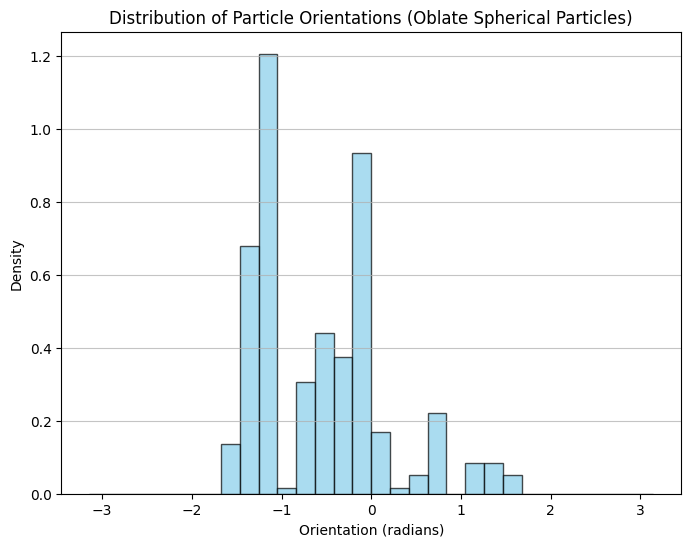

In [73]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def crop_image(image_path, x, y, w, h):
    image = cv2.imread(image_path)
    
    if image is None:
        print(f"Error: Unable to read the image at path: {image_path}")
        return None
    
    cropped_image = image[y:y+h, x:x+w]
    
    if cropped_image is None:
        print("Error: Unable to crop the image. Check the coordinates.")
    
    return cropped_image

def draw_orientation_oblate_particles(image_path):
    cropped_image = crop_image(image_path, 100, 100, 300, 300)
    
    if cropped_image is None:
        print("Error: Unable to proceed without a valid cropped image.")
        return
    
    # Convert the image to grayscale
    gray = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)
    
    # Apply histogram equalization to enhance contrast
    equalized = cv2.equalizeHist(gray)
    
    # Apply GaussianBlur to reduce noise
    blurred = cv2.GaussianBlur(equalized, (5, 5), 0)
    
    # Apply adaptive thresholding for better edge detection
    _, thresholded = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Perform morphological operations to enhance features
    kernel = np.ones((5, 5), np.uint8)
    morphed = cv2.morphologyEx(thresholded, cv2.MORPH_CLOSE, kernel)
    
    # Find contours
    contours, _ = cv2.findContours(morphed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    orientations = []

    for contour in contours:
        # Filter contours based on area
        area = cv2.contourArea(contour)
        if area > 50:  # Adjust the area threshold based on particle size
            # Approximate the contour to reduce the number of points
            epsilon = 0.02 * cv2.arcLength(contour, True)
            approx = cv2.approxPolyDP(contour, epsilon, True)

            # Filter contours based on aspect ratio (for oblate shapes)
            x, y, w, h = cv2.boundingRect(approx)
            aspect_ratio = float(w) / h
            if 0.3 < aspect_ratio < 0.8:  # Adjust aspect ratio range
                # Fit an ellipse to the contour
                if len(approx) >= 5:
                    ellipse = cv2.fitEllipse(approx)
                    cv2.ellipse(cropped_image, ellipse, (255, 0, 0), 2)

                    # Extract lines using HoughLinesP
                    lines = cv2.HoughLinesP(morphed, 1, np.pi / 180, threshold=50, minLineLength=50, maxLineGap=10)

                    if lines is not None:
                        for line in lines:
                            x1, y1, x2, y2 = line[0]
                            cv2.line(cropped_image, (x1, y1), (x2, y2), (0, 255, 0), 2)
                            # Calculate orientation based on the lines
                            angle = np.arctan2(y2 - y1, x2 - x1)
                            orientations.append(angle)

    # Plot Histogram without providing the number of particles
    plt.figure(figsize=(8, 6))
    plt.hist(orientations, bins=30, range=(-np.pi, np.pi), density=True, color='skyblue', alpha=0.7, edgecolor='black')
    plt.xlabel('Orientation (radians)')
    plt.ylabel('Density')
    plt.title('Distribution of Particle Orientations (Oblate Spherical Particles)')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

# Example Usage draw_orientation_oblate_particles("your_image_path.png")

draw_orientation_oblate_particles("Oblate-S0242.png")
draw_orientation_oblate_particles("Oblate-S0244.png")
draw_orientation_oblate_particles("Oblate-S0281.png")
draw_orientation_oblate_particles("Oblate-S0282.png")
draw_orientation_oblate_particles("Oblate-S0290.png")
draw_orientation_oblate_particles("Oblate-S0326.png")
